<a href="https://colab.research.google.com/github/gohibi/eli/blob/eli/elififa19predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Data manipulation
import pandas as pd
import numpy as np 

#data visualisation
import matplotlib.pyplot as plt;
import seaborn as sns


# Machine Learning Algorithms
from sklearn.ensemble import GradientBoostingRegressor

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [24]:
fifa19 = pd.read_csv('data.csv')
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [26]:
column = ["ID","Age","Overall","Potential","Value","Wage"]

In [27]:
fifa19=fifa19.drop(fifa19.columns.difference(column), axis="columns")


In [28]:
fifa19

,ID,Age,Overall,Potential,Value,Wage
0,158023,31,94,94,€110.5M,€565K
1,20801,33,94,94,€77M,€405K
2,190871,26,92,93,€118.5M,€290K
3,193080,27,91,93,€72M,€260K
4,192985,27,91,92,€102M,€355K
...,...,...,...,...,...,...
18202,238813,19,47,65,€60K,€1K
18203,243165,19,47,63,€60K,€1K
18204,241638,16,47,67,€60K,€1K
18205,246268,17,47,66,€60K,€1K


In [29]:
fifa19=fifa19.set_index("ID")

In [30]:
fifa19

,Age,Overall,Potential,Value,Wage
ID,,,,,
158023,31,94,94,€110.5M,€565K
20801,33,94,94,€77M,€405K
190871,26,92,93,€118.5M,€290K
193080,27,91,93,€72M,€260K
192985,27,91,92,€102M,€355K
...,...,...,...,...,...
238813,19,47,65,€60K,€1K
243165,19,47,63,€60K,€1K
241638,16,47,67,€60K,€1K


**b.	Описание процесса очистки и нормализации данных.**

In [31]:
# Remove the euros sign
fifa19['Value'] = fifa19['Value'].apply(lambda x: x.split('€')[1])

# Convert all value with 'M' to million and those with 'K' to thousand
fifa19['Value'] = fifa19['Value'].apply(
    lambda x: float(x.split('M')[0])*1000000 
    if x.split('M').__len__() > 1 else float(x.split('K')[0])*1000
)

Convert the Wage column from string to numerical value

In [32]:
fifa19['Wage'] = fifa19['Wage'].apply(lambda x: x.split('€')[1])
fifa19['Wage'] = fifa19['Wage'].apply(
    lambda x: float(x.split('M')[0])*1000000 
    if x.split('M').__len__() > 1 else float(x.split('K')[0])*1000
)

In [33]:
fifa19

,Age,Overall,Potential,Value,Wage
ID,,,,,
158023,31,94,94,110500000.0,565000.0
20801,33,94,94,77000000.0,405000.0
190871,26,92,93,118500000.0,290000.0
193080,27,91,93,72000000.0,260000.0
192985,27,91,92,102000000.0,355000.0
...,...,...,...,...,...
238813,19,47,65,60000.0,1000.0
243165,19,47,63,60000.0,1000.0
241638,16,47,67,60000.0,1000.0


In [35]:
nan_fifa = fifa19[fifa19.isna().any(axis=1)]
display(nan_fifa.head())


fifa19 = fifa19.dropna(how='all')
fifa19.head()

,Age,Overall,Potential,Value,Wage
ID,,,,,


,Age,Overall,Potential,Value,Wage
ID,,,,,
158023,31,94,94,110500000.0,565000.0
20801,33,94,94,77000000.0,405000.0
190871,26,92,93,118500000.0,290000.0
193080,27,91,93,72000000.0,260000.0
192985,27,91,92,102000000.0,355000.0


fin question b

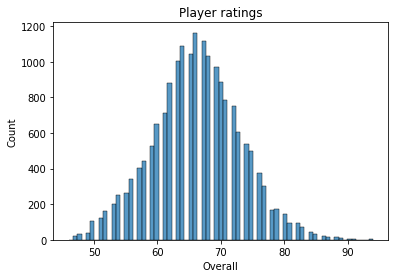

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [54]:
ax=sns.histplot(data=fifa19,x="Overall")
ax.set_title(label='Player ratings', fontsize=12)
plt.show()

fifa19['Overall'].describe()

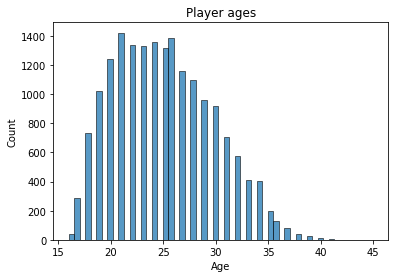

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [55]:
ax=sns.histplot(data=fifa19,x="Age")
ax.set_title(label='Player ages', fontsize=12)
plt.show()

fifa19['Age'].describe()

**Разделите набор данных на обучающий набор и тестовый набор**
**c.	Описание применяемого метода обработки.**
la methode choisie "gradient boosting regression"( c la methode faut decrire voir google ) 

In [65]:
X = fifa19[['Age', 'Overall', 'Potential', 'Wage']]
y = fifa19['Value']

# train test split and split the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

d.	Результаты обработки по обучающей и тестовой выборкам.

In [72]:
GBRegressor = GradientBoostingRegressor(n_estimators = 500)
GBRegressor= GBRegressor.fit(X_train, y_train)
y_pred=GBRegressor.predict(X_test)


In [75]:
print(X_train)

        Age  Overall  Potential     Wage
ID                                      
241024   21       57         68   2000.0
163570   34       64         64   3000.0
200577   31       68         68   4000.0
231786   24       69         76      0.0
242525   20       56         68   1000.0
...     ...      ...        ...      ...
222052   24       66         70   2000.0
224018   26       62         65   5000.0
244464   23       66         75   6000.0
235990   21       65         77   3000.0
230967   24       73         78  15000.0

[14565 rows x 4 columns]


In [76]:
print(X_test)

        Age  Overall  Potential    Wage
ID                                     
228381   22       58         65  1000.0
223146   22       62         69  2000.0
208771   24       62         65  1000.0
228388   23       67         76  4000.0
243243   19       58         72  1000.0
...     ...      ...        ...     ...
240586   22       57         68  4000.0
229378   20       61         75  6000.0
242217   20       63         74  3000.0
239876   20       53         66  2000.0
246047   17       50         72  1000.0

[3642 rows x 4 columns]


In [77]:
print(y_test)

ID
228381     180000.0
223146     425000.0
208771     375000.0
228388    1200000.0
243243     250000.0
            ...    
240586     160000.0
229378     550000.0
242217     625000.0
239876     110000.0
246047      60000.0
Name: Value, Length: 3642, dtype: float64


In [78]:
print(y_train)

ID
241024     180000.0
163570     220000.0
200577     575000.0
231786          0.0
242525     140000.0
            ...    
222052     700000.0
224018     375000.0
244464    1000000.0
235990     775000.0
230967    5500000.0
Name: Value, Length: 14565, dtype: float64


In [89]:
y_pred =y_pred.reshape(-1,1)
print(y_pred)
#pour un joueur qui a ses Age(22),Overall(58),Potential(65),Wage(1000.0) 
#aura pour Value(valeur marchande) 177410.80621987 euro dapres les preidictions

[[177410.80621987]
 [394348.38841425]
 [362866.52466347]
 ...
 [608143.70758671]
 [113738.37305111]
 [ 92111.25647163]]


**e.	Оценка качества применяемого метода.**

jai cree une fonction qui te permettra de calculer les metrics pour voir les perfomances de ton modele 
les calculs sont sur les pages suivantes


In [69]:
def calculation_evaluations(y: pd.Series, pre: np.ndarray) -> None:
  print('Mean Squared Error: {:.3f}'.format(mean_squared_error(y, pre)))
  print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(y, pre)))
  print('score: {:.3f}'.format(r2_score(y, pre)))
  print('Root Mean Squared Error : {:.3f}'.format(np.sqrt(mean_squared_error(y, pre))))
  print('Accuracy:',format(r2_score(y, pre)* 100,'.2f'),'%')

In [74]:
calculation_evaluations(y_test,y_pred)

Mean Squared Error: 778190907090.963
Mean Absolute Error: 284687.634
score: 0.974
Root Mean Squared Error : 882151.295
Accuracy: 97.44 %


In [ ]:
#https://dev.to/jundelikwo/predicting-fifa19-player-market-value-2dc7 description du dataset et traitement du dataset
#https://www.kaggle.com/karangadiya/fifa19?select=data.csv telecharger dataset